# Taxi Fare Predictor

In [1]:
%matplotlib inline

In [30]:
import warnings
warnings.filterwarnings(action='once')

import math
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns



In [3]:
def get_data(path):
    train_data = pd.read_csv(path + 'train.csv')
    test_data = pd.read_csv(path + 'test.csv')
    return train_data, test_data

In [4]:
path = '../../../datasets/taxi-fair-data/'
train_data, test_data = get_data(path)

In [5]:
tc = train_data.copy()
tc.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [6]:
tc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55423856 entries, 0 to 55423855
Data columns (total 8 columns):
key                  object
fare_amount          float64
pickup_datetime      object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      int64
dtypes: float64(5), int64(1), object(2)
memory usage: 3.3+ GB


In [7]:
tc.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,5.542386e+07,5.542386e+07,5.542386e+07,5.542348e+07,5.542348e+07,5.542386e+07
mean,1.134505e+01,-7.250968e+01,3.991979e+01,-7.251121e+01,3.992068e+01,1.685380e+00
std,2.071083e+01,1.284888e+01,9.642353e+00,1.278220e+01,9.633346e+00,1.327664e+00
min,-3.000000e+02,-3.442060e+03,-3.492264e+03,-3.442025e+03,-3.547887e+03,0.000000e+00
25%,6.000000e+00,-7.399207e+01,4.073493e+01,-7.399140e+01,4.073403e+01,1.000000e+00
50%,8.500000e+00,-7.398180e+01,4.075265e+01,-7.398015e+01,4.075316e+01,1.000000e+00
75%,1.250000e+01,-7.396708e+01,4.076713e+01,-7.396367e+01,4.076810e+01,2.000000e+00
max,9.396336e+04,3.457626e+03,3.408790e+03,3.457622e+03,3.537133e+03,2.080000e+02


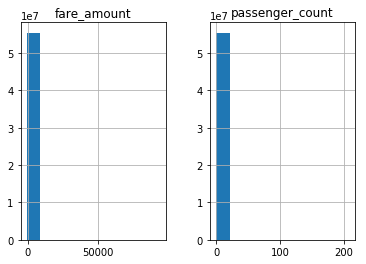

In [8]:
attributes = ['fare_amount', 'passenger_count']
tc[attributes].hist()
plt.show()

It's been recommended to remove all data points with fare_amount > 100, since these are very unusual anomalies.

In [9]:
tc = tc[tc.fare_amount < 100]

C:\Users\Tuomas\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Tuomas\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:475: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  grid,delta = np.linspace(a,b,gridsize,retstep=True)


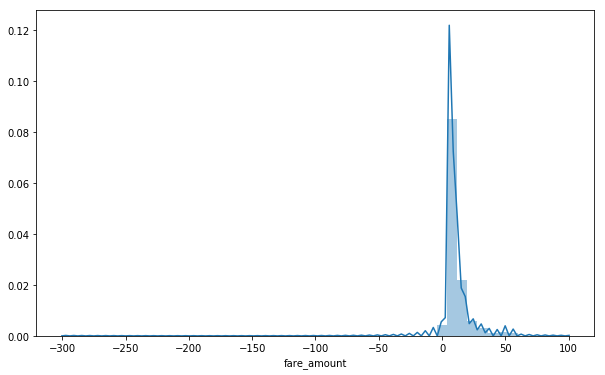

In [10]:
plt.figure(figsize = (10, 6))
sns.distplot(tc['fare_amount']);
plt.show()

The fare_amount column definitely needs some more work. It seems that there are multiple below zero fare_amount data points.

In [11]:
invalid_fares = tc[tc['fare_amount'] <= 0]
print(f'Number of invalid fares:{len(invalid_fares)}')
print(f'Example row: \n-------------\n{invalid_fares.iloc[0]}')

Number of invalid fares:3834
Example row: 
-------------
key                  2010-03-09 23:37:10.0000005
fare_amount                                 -2.9
pickup_datetime          2010-03-09 23:37:10 UTC
pickup_longitude                        -73.7895
pickup_latitude                          40.6435
dropoff_longitude                       -73.7887
dropoff_latitude                          40.642
passenger_count                                1
Name: 2039, dtype: object


Now I would remove all taxi fare values <= 0, but based on one kaggle discussion, the minimum taxi fare in NYC is 2.5$, meaning anything less is literally impossible in terms of taxi fare law.

In [12]:
tc.shape

(55400957, 8)

In [13]:
tc = tc[tc.fare_amount >= 2.5]

In [14]:
tc.shape

(55396210, 8)

C:\Users\Tuomas\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Tuomas\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:475: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  grid,delta = np.linspace(a,b,gridsize,retstep=True)


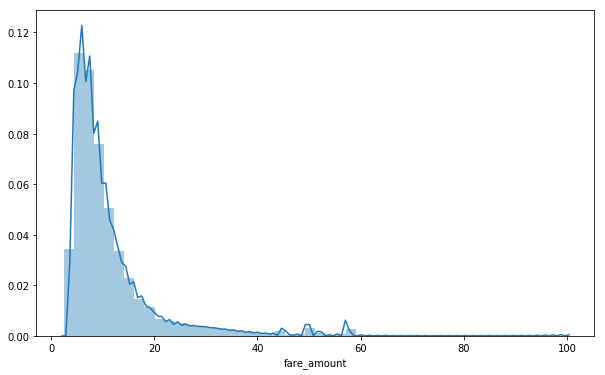

In [15]:
plt.figure(figsize = (10, 6))
sns.distplot(tc['fare_amount']);
plt.show()

In [16]:
# Normalization not required for Random Forest
#plt.figure(figsize = (10, 6))
#sns.distplot(np.log(tc['fare_amount']), kde=False);
#plt.show()

The passenger_count also seemed a bit weird, so I'm going to take a closer look.

C:\Users\Tuomas\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Tuomas\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:475: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  grid,delta = np.linspace(a,b,gridsize,retstep=True)


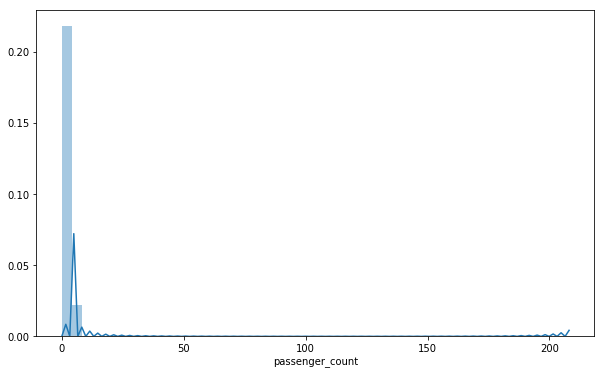

In [17]:
plt.figure(figsize = (10, 6))
sns.distplot(tc['passenger_count']);
plt.show()

Even a taxi van can't hold more than ten passengers, so I'm going to assume that every data point over that is a mistake.

In [18]:
tc = tc[tc.passenger_count < 10]

C:\Users\Tuomas\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Tuomas\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:475: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  grid,delta = np.linspace(a,b,gridsize,retstep=True)


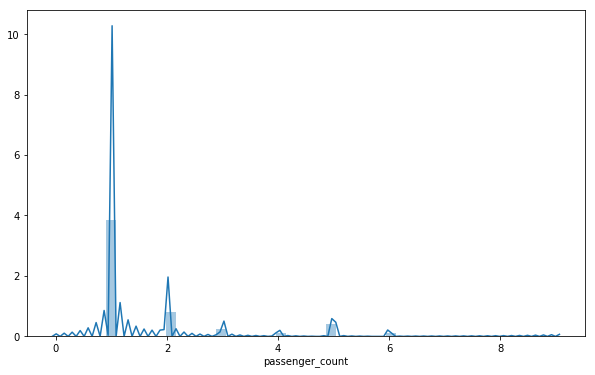

In [19]:
plt.figure(figsize = (10, 6))
sns.distplot(tc['passenger_count']);
plt.show()

It seems that like in the fare_amount variable, passenger_count also includes impossible values like -1.

In [20]:
invalid_passenger_counts = tc[tc['passenger_count'] < 1]
print(f'Number of invalid passenger counts:{len(invalid_passenger_counts)}')
print(f'Example row: \n-------------\n{invalid_passenger_counts.iloc[0]}')

Number of invalid passenger counts:195351
Example row: 
-------------
key                  2015-06-02 23:16:15.00000012
fare_amount                                    34
pickup_datetime           2015-06-02 23:16:15 UTC
pickup_longitude                         -73.9749
pickup_latitude                           40.7511
dropoff_longitude                        -73.9085
dropoff_latitude                          40.8819
passenger_count                                 0
Name: 314, dtype: object


In [21]:
tc = tc[tc.passenger_count >= 1]

C:\Users\Tuomas\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Tuomas\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:475: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  grid,delta = np.linspace(a,b,gridsize,retstep=True)


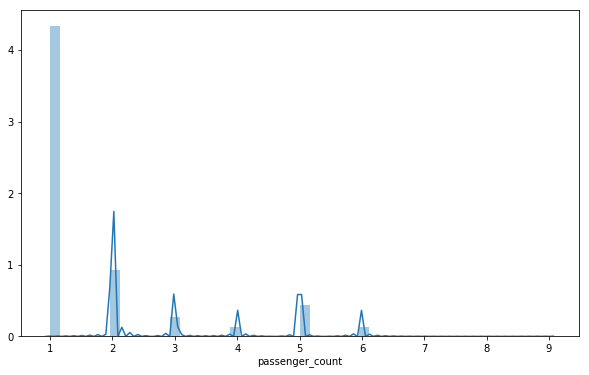

In [22]:
plt.figure(figsize = (10, 6))
sns.distplot(tc['passenger_count']);
plt.show()

Counts over six also seem like noice and are quite rare given normal taxi sizes in NYC.

In [23]:
tc = tc[tc.passenger_count < 7]

C:\Users\Tuomas\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Tuomas\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:475: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  grid,delta = np.linspace(a,b,gridsize,retstep=True)


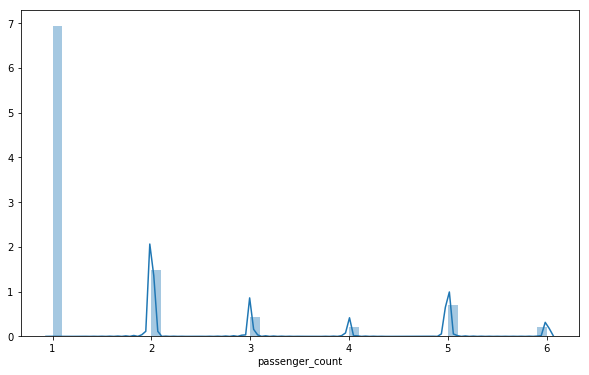

In [24]:
plt.figure(figsize = (10, 6))
sns.distplot(tc['passenger_count']);
plt.show()

C:\Users\Tuomas\Anaconda3\lib\site-packages\_pytest\fixtures.py:844: DeprecationWarning: The `convert` argument is deprecated in favor of `converter`.  It will be removed after 2019/01.
  params = attr.ib(convert=attr.converters.optional(tuple))


AttributeError: 'str' object has no attribute 'isnull'

In [ ]:
def deg2rad(degrees):
    return degrees * math.pi / 180

def coordinate_distance(lat1, lon1, lat2, lon2):
    earths_radius = 6371
    rad_lat = deg2rad(lat2-lat1)
    rat_lon = deg2rad(lon2-lon1)
    rad_lat1 = deg2rad(lat1)
    rad_lat2 = deg2rad(lat2)
    a = math.sin(rad_lat/2) * math.sin(rad_lat/2) + math.sin(rad_lon/2) * math.sin(rad_lon/2) * math.cos(lat1) * math.cos(lat2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a)) 
    return earths_radius * c